In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2025-04-22 02:17:59--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.22.200, 16.182.98.65, 52.217.132.201, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.22.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  53.8MB/s    in 4m 41s  

2025-04-22 02:22:40 (65.7 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2025-04-22 02:22:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.178.115, 52.217.233.145, 16.15.179.180, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.178.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[==========

In [2]:
from zipfile import ZipFile, BadZipFile
import os

def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)

        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)

    except BadZipFile as e:
        print("Error:", e)


extract_train_path = "./coco_train2017"
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"

extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [3]:
!pip install datasets

In [4]:
!pip install transformers datasets torchvision evaluate
!pip install ftfy --quiet

  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s eta 0:00:00
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (792 kB)
Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (471 kB)
Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Attempting uninstall: huggingface-hub
    F

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2Tokenizer
from PIL import Image
import os
import json
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name).to(device)
feature_extractor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set tokenizer config
tokenizer.pad_token = tokenizer.eos_token
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_to

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

In [19]:
class CocoDataset(Dataset):
    def __init__(self, image_dir, ann_file, max_target_len=64, n_samples=10000):
        self.image_dir = image_dir
        with open(ann_file, 'r') as f:
            self.annotations = json.load(f)['annotations'][:n_samples]
        self.max_target_len = max_target_len

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        ann = self.annotations[idx]
        image_id = ann['image_id']
        caption = ann['caption']
        image_path = os.path.join(self.image_dir, f"{image_id:012d}.jpg")
        image = Image.open(image_path).convert("RGB")

        # Process image
        pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values[0]

        # Process caption
        encoding = tokenizer(
            caption,
            padding="max_length",
            truncation=True,
            max_length=self.max_target_len,
            return_tensors="pt"
        )
        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)

        return pixel_values, input_ids, attention_mask


In [21]:
def collate_fn(batch):
    pixel_values = torch.stack([x[0] for x in batch])
    input_ids = torch.stack([x[1] for x in batch])
    attention_mask = torch.stack([x[2] for x in batch])
    return pixel_values, input_ids, attention_mask

def train(model, dataloader, epochs=3, lr=5e-5):
    model.train()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    for epoch in range(epochs):
        total_loss = 0
        for pixel_values, input_ids, attention_mask in dataloader:
            pixel_values = pixel_values.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            outputs = model(
                pixel_values=pixel_values,
                labels=input_ids,
                decoder_attention_mask=attention_mask  # ✅ Correct usage
            )

            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss / len(dataloader):.4f}")


In [22]:
coco_root = "coco_train2017/train2017"
annotations_path = "coco_ann2017/annotations/captions_train2017.json"

dataset = CocoDataset(image_dir=coco_root, ann_file=annotations_path)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

train(model, dataloader, epochs=3)

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch 1/3 - Loss: 0.7442
Epoch 2/3 - Loss: 0.6232
Epoch 3/3 - Loss: 0.5636


In [23]:
def generate_caption(image_path):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)

    output_ids = model.generate(pixel_values, max_length=64, num_beams=4)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption


In [26]:
img_path = "coco_val2017/val2017/000000000285.jpg"
print("Caption:", generate_caption(img_path))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Caption:  close of brown with eyes a and bear


In [ ]:
!pip install evaluate
import evaluate

bleu = evaluate.load("bleu")
cider = evaluate.load("cider")

preds = []
refs = []

for ann in val_annotations["annotations"][:100]:  # use a small val split for testing
    image_id = ann["image_id"]
    ref_caption = ann["caption"]
    image_path = os.path.join(val_images_dir, f"{image_id:012d}.jpg")
    
    pred_caption = generate_caption(image_path)
    preds.append(pred_caption)
    refs.append([ref_caption])  # list of references

# Compute BLEU and CIDEr
print("BLEU:", bleu.compute(predictions=preds, references=refs))
print("CIDEr:", cider.compute(predictions=preds, references=refs))


In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# Function to generate caption
def generate_caption(image_path):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
    output_ids = model.generate(pixel_values, max_length=64, num_beams=4)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Function to display image with both captions
def show_image_with_captions(image_id, image_dir, annotations):
    image_path = os.path.join(image_dir, f"{image_id:012d}.jpg")
    image = Image.open(image_path).convert("RGB")

    # Get ground truth caption(s)
    gt_captions = [ann["caption"] for ann in annotations if ann["image_id"] == image_id]
    gt_caption = gt_captions[0] if gt_captions else "No caption found"

    # Get model prediction
    pred_caption = generate_caption(image_path)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"🔷 Ground Truth: {gt_caption}\n🧠 Predicted: {pred_caption}", fontsize=12)
    plt.show()

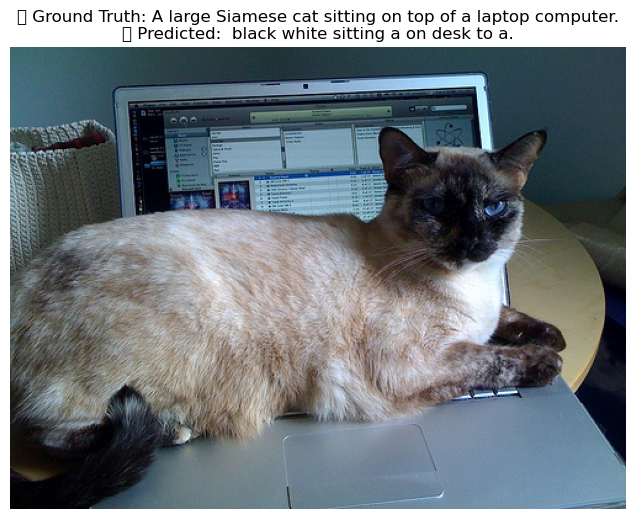

In [37]:
# Load annotations
val_anno_path = "coco_ann2017/annotations/captions_val2017.json"
with open(val_anno_path, 'r') as f:
    val_annotations = json.load(f)["annotations"]

# Pick a random image ID from val
val_images_dir = "coco_val2017/val2017/"
sample_ann = random.choice(val_annotations)
sample_image_id = sample_ann["image_id"]

# Display
show_image_with_captions(sample_image_id, val_images_dir, val_annotations)


In [39]:
!pip install evaluate
import evaluate

bleu = evaluate.load("bleu")
# cider = evaluate.load("cider")

preds = []
refs = []

for ann in val_annotations["annotations"][:100]:  # use a small val split for testing
    image_id = ann["image_id"]
    ref_caption = ann["caption"]
    image_path = os.path.join(val_images_dir, f"{image_id:012d}.jpg")
    
    pred_caption = generate_caption(image_path)
    preds.append(pred_caption)
    refs.append([ref_caption])  # list of references

# Compute BLEU and CIDEr
print("BLEU:", bleu.compute(predictions=preds, references=refs))
# print("CIDEr:", cider.compute(predictions=preds, references=refs))

TypeError: list indices must be integers or slices, not str

In [41]:
!pip install nltk rouge-score --quiet


In [42]:
!pip install evaluate --quiet

import evaluate
import os
import json
from tqdm import tqdm
from PIL import Image

# Load metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Paths
val_images_dir = "coco_val2017/val2017/"
val_anno_path = "coco_ann2017/annotations/captions_val2017.json"

# Load COCO validation annotations
with open(val_anno_path, 'r') as f:
    val_annotations = json.load(f)["annotations"]

# Map image_id -> [captions]
from collections import defaultdict
id_to_captions = defaultdict(list)
for ann in val_annotations:
    id_to_captions[ann["image_id"]].append(ann["caption"])

# Get unique image IDs (for evaluation)
unique_image_ids = list(id_to_captions.keys())

# Evaluate on N samples (adjust if needed)
N = 500
predictions = []
references = []

def generate_caption(image_path):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
    output_ids = model.generate(pixel_values, max_length=64, num_beams=4)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption.strip()

# Loop over image IDs and compute predictions
print("⏳ Generating predictions and computing metrics...")
for image_id in tqdm(unique_image_ids[:N]):
    image_path = os.path.join(val_images_dir, f"{image_id:012d}.jpg")
    if not os.path.exists(image_path):
        continue

    pred_caption = generate_caption(image_path)
    ref_captions = id_to_captions[image_id]

    predictions.append(pred_caption)
    references.append(ref_captions)  # ROUGE + BLEU support multiple refs

# Compute scores
bleu_result = bleu.compute(predictions=predictions, references=references)
rouge_result = rouge.compute(predictions=predictions, references=references)

# Show scores
print("\n📊 Evaluation Results:")
print("BLEU:", bleu_result)
print("ROUGE:", rouge_result)


⏳ Generating predictions and computing metrics...


100%|██████████| 500/500 [02:32<00:00,  3.28it/s]



📊 Evaluation Results:
BLEU: {'bleu': 0.009823008595149497, 'precisions': [0.518155854753162, 0.034075420263516586, 0.0017939518195797027, 0.00029394473838918284], 'brevity_penalty': 1.0, 'length_ratio': 1.065883887801696, 'translation_length': 4902, 'reference_length': 4599}
ROUGE: {'rouge1': 0.45640318456354745, 'rouge2': 0.03980669490617661, 'rougeL': 0.3666260790014123, 'rougeLsum': 0.3669406793390567}


In [43]:
!pip install sacrebleu --quiet

In [44]:
import evaluate

sacrebleu = evaluate.load("sacrebleu")

In [45]:
sacrebleu_result = sacrebleu.compute(predictions=predictions, references=references)

print("\n📊 Evaluation Results (Relaxed):")
print("SacreBLEU:", sacrebleu_result)



📊 Evaluation Results (Relaxed):
SacreBLEU: {'score': 0.9823008595149489, 'counts': [2540, 150, 7, 1], 'totals': [4902, 4402, 3902, 3402], 'precisions': [51.8155854753162, 3.4075420263516585, 0.17939518195797027, 0.029394473838918283], 'bp': 1.0, 'sys_len': 4902, 'ref_len': 4862}
